In [1]:
%matplotlib inline
# IMportaar las librerias estandar y conocidas de Qiskit
from qiskit import *
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

In [2]:
#Generando un registro de un circuito cuantico
qr = QuantumRegister(2)

In [3]:
#Generando un registro de un circuito clasico
cr = ClassicalRegister(2)

In [4]:
#Creamos el circuito
circuit = QuantumCircuit(qr, cr)

In [5]:
#Mostramos el circuito
circuit.draw()

q0_0: |0>
         
q0_1: |0>
         
 c0_0: 0 
         
 c0_1: 0

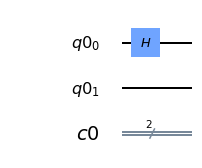

In [6]:
#Aplicamos el circuito de Hadamard en el primer Qubit
circuit.h(qr[0])
circuit.draw(output='mpl')

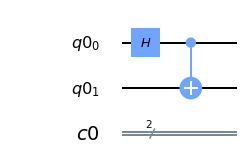

In [7]:
#Hacer un equivalente de If - else en computadoras clasicas
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

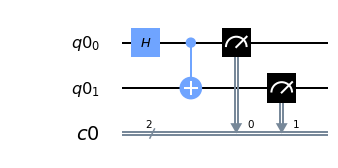

In [8]:
#Vamos a medir los resultados del bit cuantico y los almacenamos en los bits clasicos
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [9]:
#Ejecutamos el codigo en nuestro simulador Aer
simulator = Aer.get_backend('qasm_simulator')

In [10]:
#Ejecutar la simulacion del circuito

result = execute(circuit, backend= simulator).result()

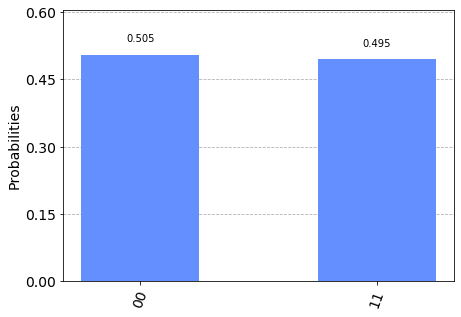

In [11]:
#Graficamos los resultados
plot_histogram(result.get_counts(circuit))

In [13]:
#Probamos el codigo en las maquinas cuanticas reales pero antes registramos nuestro token para acceder
IBMQ.save_account('', overwrite=True)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [14]:
#Inicializamos la maquina o instancia en la que queremos ejecutar
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_ourense')

In [15]:
# Mandamos a ejecutar el codigo a la maquina que seleccionamos
job = execute(circuit, backend=qcomp, shots=1024)
print(job.job_id())
job_monitor(job)

5e65c9bb63697c001972b62e
Job Status: job has successfully run


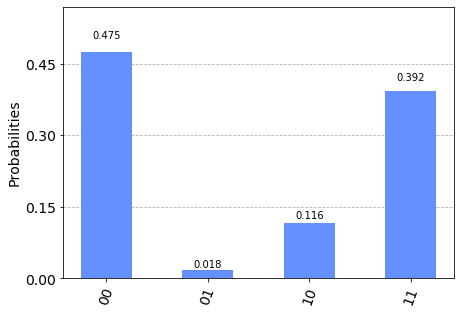

In [16]:
#Mostramos los resultados de la ejecucion

result_job = job.result()
plot_histogram(result_job.get_counts(circuit))

Debido a que el resultado en una computadora cuantica real es menos preciso que una computadora clasica, se generan un mayor margen de error o llamados errores cuanticos.